In [1]:
import pysmile
import pysmile_license
import numpy as np
import pandas as pd

from df_plot import plot_df 
from info_value_to_net import info_value_to_net
from get_info_values import mutual_info_measures, cond_kl_divergence
from save_info_values import save_info_values
from plots import plot_cond_mut_info, plot_relative_cond_mut_info, plot_cond_mut_info_bounds

np.seterr(divide='ignore', invalid = 'ignore')

# Read the network
net = pysmile.Network()
net.read_file("genie_models/Basic_ID_screening_current_read.xdsl")

In [18]:
net.clear_all_evidence()

net.set_evidence("Age", "age_4_adult")
net.set_evidence("Sex", "M")
net.set_evidence("SD", "SD_1_short")
net.set_evidence("PA", "PA_2")
net.set_evidence("Smoking", "sm_1_not_smoker")
net.set_evidence("BMI", "bmi_3_overweight")
net.set_evidence("Alcohol", "low")

net.update_beliefs()

print("David's probability of CRC:", net.get_node_value("CRC")[1])

David's probability of CRC: 0.0008571886717245084


In [19]:
net.clear_all_evidence()

net.set_evidence("Age", "age_2_young")
net.set_evidence("Sex", "M")
net.set_evidence("SD", "SD_1_short")
net.set_evidence("PA", "PA_2")
net.set_evidence("Smoking", "sm_1_not_smoker")
net.set_evidence("BMI", "bmi_2_normal")
net.set_evidence("Alcohol", "low")

net.update_beliefs()

print("Dani's probability of CRC:", net.get_node_value("CRC")[1])

Dani's probability of CRC: 0.00016487156854109932


---
## Upper and lower bounds

In [20]:
import numpy as np

lower_bound_array = np.empty((3, 14))

# Assign values to the array
lower_bound_array[0, :7] = [1, 0, 0, 0, 0, 0, 0]  # Probability of test knowing CRC is false
lower_bound_array[1, :7] = [0,	0.95,	0.93,	0.9,	0.85,	0.87,	0.9]  # Probability of test knowing CRC is false (predicted false)
lower_bound_array[2, :7] = [0,	0.05,	0.07,	0.1,	0.15,	0.13,	0.1]  # Probability of test knowing CRC is false (predicted true)

lower_bound_array[0, 7:] = [1,	0,	0,	0,	0,	0,	0]  # Probability of test knowing CRC is true
lower_bound_array[1, 7:] = [0,	0.6,	0.45,	0.3,	0.1,	0.25,	0.17]  # Probability of test knowing CRC is true (predicted false)
lower_bound_array[2, 7:] = [0,	0.40,	0.55,	0.6,	0.9,	0.75,	0.83]  # Probability of test knowing CRC is true (predicted true)

# Print the array
print(lower_bound_array.transpose().flatten())

[1.   0.   0.   0.   0.95 0.05 0.   0.93 0.07 0.   0.9  0.1  0.   0.85
 0.15 0.   0.87 0.13 0.   0.9  0.1  1.   0.   0.   0.   0.6  0.4  0.
 0.45 0.55 0.   0.3  0.6  0.   0.1  0.9  0.   0.25 0.75 0.   0.17 0.83]


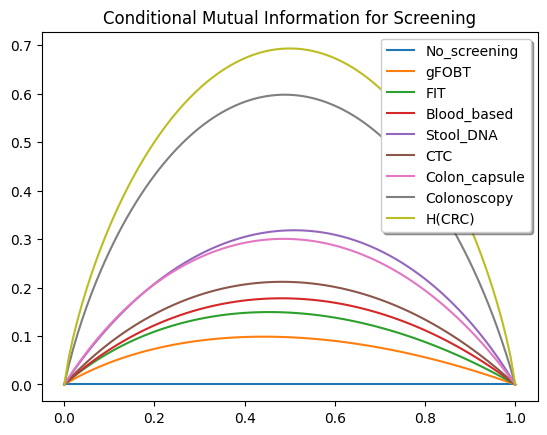

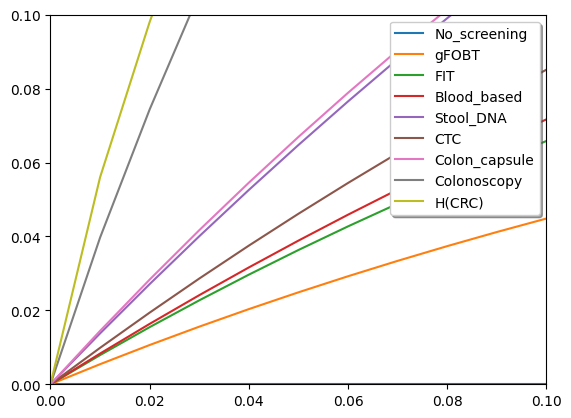

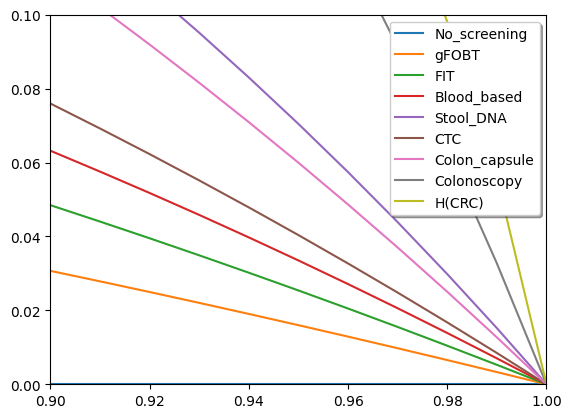

In [26]:
net1 = net
net1.set_node_definition("Results_of_Screening", lower_bound_array.transpose().flatten())

net1.write_file(f"genie_models/Basic_ID_screening_current_inference_lowerbound.xdsl")

net1 = pysmile.Network()
net1.read_file("genie_models/Basic_ID_screening_current_inference_lowerbound.xdsl")

plot_cond_mut_info(net1)

In [22]:
# Create an empty array with three rows and fourteen columns
upper_bound_array = np.empty((3, 14))

# Assign values to the array
upper_bound_array[0, :7] = [1, 0, 0, 0, 0, 0, 0]  # Probability of test knowing CRC is false
upper_bound_array[1, :7] = [0,	0.978,	0.966,	0.91,	0.866,	0.89,	0.92]  # Probability of test knowing CRC is false (predicted false)
upper_bound_array[2, :7] = [0,	0.022,	0.034,	0.09,	0.134,	0.11,	0.08]  # Probability of test knowing CRC is false (predicted true)

upper_bound_array[0, 7:] = [1,	0,	0,	0,	0,	0,	0]  # Probability of test knowing CRC is true
upper_bound_array[1, 7:] = [0,	0.55,	0.25,	0.34,	0.077,	0.2,	0.13]  # Probability of test knowing CRC is true (predicted false)
upper_bound_array[2, 7:] = [0,	0.45,	0.75,	0.66,	0.923,	0.8,	0.87]  # Probability of test knowing CRC is true (predicted true)

# Print the array
print(upper_bound_array.transpose().flatten())

[1.    0.    0.    0.    0.978 0.022 0.    0.966 0.034 0.    0.91  0.09
 0.    0.866 0.134 0.    0.89  0.11  0.    0.92  0.08  1.    0.    0.
 0.    0.55  0.45  0.    0.25  0.75  0.    0.34  0.66  0.    0.077 0.923
 0.    0.2   0.8   0.    0.13  0.87 ]


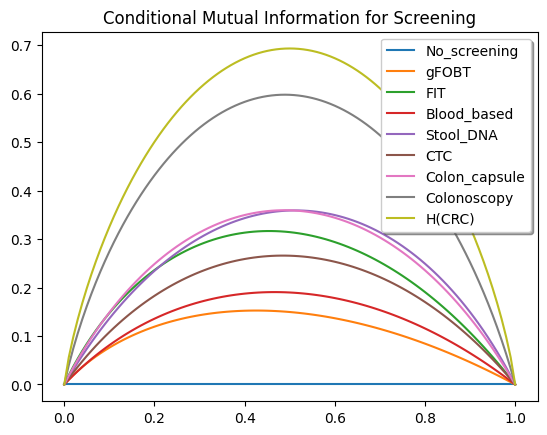

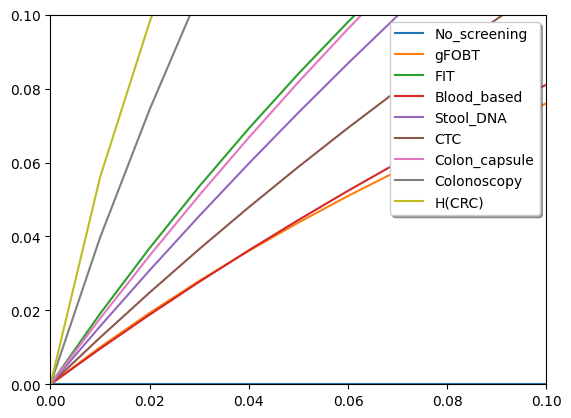

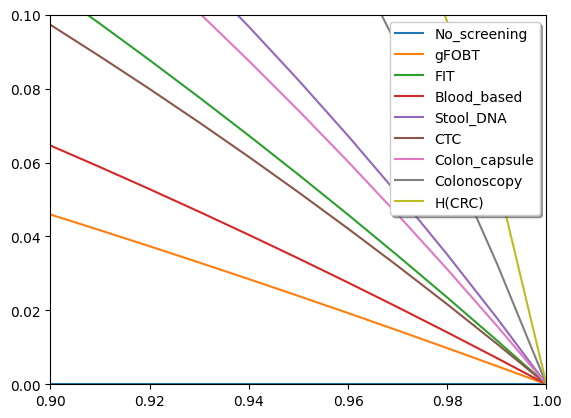

In [27]:
net2 = net
net2.set_node_definition("Results_of_Screening", upper_bound_array.transpose().flatten())

net2.write_file(f"genie_models/Basic_ID_screening_current_inference_upperbound.xdsl")

net2 = pysmile.Network()
net2.read_file("genie_models/Basic_ID_screening_current_inference_upperbound.xdsl")


plot_cond_mut_info(net2)

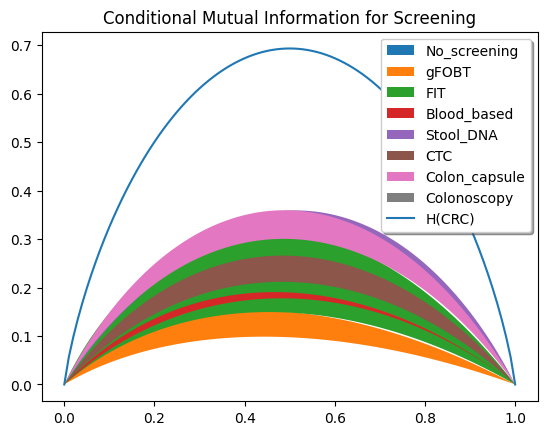

In [28]:
plot_cond_mut_info_bounds(net1, net2)

In [14]:
net_array

[<pysmile.Network at 0x25d36a7e770>, <pysmile.Network at 0x25d36a7e770>]

Text(0.5, 1.0, 'Conditional Mutual Information for Screening')

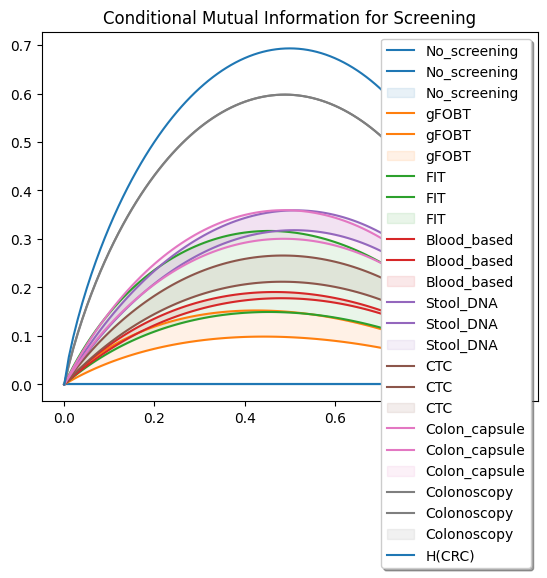

In [33]:
import matplotlib.pyplot as plt

net_array = [net1]
if net2 is not None:
    net_array.append(net2)

dict_net = {}
for net in net_array:
    arr = []
    h_y_arr = []
    i = 0

    for prob in np.arange(0, 1.01, 0.01):

        p_CRC_false, p_CRC_true = [1-prob, prob] 

        p_y = np.array([p_CRC_false, p_CRC_true])
        H_y = np.sum(p_y * np.log(1 / p_y) )

        dict_scr, dict_col = mutual_info_measures(net, p_CRC_false, p_CRC_true)

        cond_mut_info_scr = dict_scr["cond_mut_info"]
        cond_mut_info_col = dict_col["cond_mut_info"]
        

        # Save the conditional mutual information for screening
        pd.DataFrame(cond_mut_info_scr.flatten()).transpose().to_csv("value_of_info_csv/cond_mut_info_scr.csv")

        df_plotted_scr = plot_df(cond_mut_info_scr, net, ["Results_of_Screening", "CRC", "Screening"])

        aux_arr_scr = df_plotted_scr.sum(axis = 0).values.reshape(2,7).sum(axis = 0)


        # Save the conditional mutual information for colonoscopy
        pd.DataFrame((cond_mut_info_col).flatten()).transpose().to_csv("value_of_info_csv/cond_mut_info_col.csv")

        df_plotted_col = plot_df(cond_mut_info_col, net, ["Results_of_Colonoscopy", "CRC", "Colonoscopy"])

        aux_arr_col = df_plotted_col.sum(axis = 0).values.reshape(2,2).sum(axis = 0)


        arr = np.append(arr, np.append(aux_arr_scr, np.expand_dims(aux_arr_col[1], axis = 0) ,0) , 0)  
        h_y_arr = np.append(h_y_arr, H_y)

    arr = arr.reshape(101,8)
    arr = arr.transpose()

    h_y_arr = np.nan_to_num(h_y_arr, 0)

    dict_net[net] = [arr, h_y_arr]

fig, ax = plt.subplots()
labels = net.get_outcome_ids("Screening") + ["Colonoscopy"]

colors = colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] #  plt.cm.viridis(np.linspace(0, 1, len(labels)))

for screening in range(arr.shape[0]):
    color = colors[screening]
    x = np.arange(0,1.01,0.01)
    y1 = dict_net[net_array[0]][0][screening]
    y2 = dict_net[net_array[1]][0][screening]

    ax.plot(x, y1, color = color)
    ax.plot(x, y2, color = color)
    ax.fill_between(x, y1, y2, alpha = 0.1, label = f"{labels[screening]}", color = color)
   

ax.plot(np.arange(0,1.01,0.01), h_y_arr, label = "H(CRC)")
leg = plt.legend(loc='upper right', shadow=True)
title = "Conditional Mutual Information for Screening"
plt.title(title)




In [11]:
ax.fill_between(np.arange(0,1.01,0.01), dict_net[net_array[0]][0][screening], dict_net[net_array[1]][0][screening], label = f"{labels[screening]}")

In [16]:
dict_net[net_array[0]][0][screening]

array([0.        , 0.03968934, 0.07437385, 0.1057478 , 0.13462576,
       0.16149005, 0.1866602 , 0.21036358, 0.23277021, 0.25401199,
       0.27419417, 0.29340264, 0.31170875, 0.32917268, 0.34584583,
       0.36177257, 0.37699154, 0.39153667, 0.40543796, 0.41872208,
       0.43141288, 0.44353178, 0.4550981 , 0.4661293 , 0.47664127,
       0.48664845, 0.49616401, 0.50520001, 0.51376748, 0.52187653,
       0.52953645, 0.53675576, 0.54354232, 0.5499033 , 0.55584534,
       0.5613745 , 0.56649634, 0.57121596, 0.57553801, 0.57946673,
       0.58300596, 0.58615917, 0.58892949, 0.59131968, 0.5933322 ,
       0.59496919, 0.59623249, 0.59712364, 0.59764389, 0.59779422,
       0.59757532, 0.5969876 , 0.59603123, 0.59470606, 0.59301172,
       0.59094751, 0.5885125 , 0.58570546, 0.58252486, 0.5789689 ,
       0.57503545, 0.57072211, 0.56602611, 0.56094436, 0.55547343,
       0.5496095 , 0.54334836, 0.53668542, 0.5296156 , 0.52213338,
       0.51423273, 0.5059071 , 0.49714932, 0.48795162, 0.47830

In [17]:
dict_net[net_array[1]][0][screening]

array([0.        , 0.03968934, 0.07437385, 0.1057478 , 0.13462576,
       0.16149005, 0.1866602 , 0.21036358, 0.23277021, 0.25401199,
       0.27419417, 0.29340264, 0.31170875, 0.32917268, 0.34584583,
       0.36177257, 0.37699154, 0.39153667, 0.40543796, 0.41872208,
       0.43141288, 0.44353178, 0.4550981 , 0.4661293 , 0.47664127,
       0.48664845, 0.49616401, 0.50520001, 0.51376748, 0.52187653,
       0.52953645, 0.53675576, 0.54354232, 0.5499033 , 0.55584534,
       0.5613745 , 0.56649634, 0.57121596, 0.57553801, 0.57946673,
       0.58300596, 0.58615917, 0.58892949, 0.59131968, 0.5933322 ,
       0.59496919, 0.59623249, 0.59712364, 0.59764389, 0.59779422,
       0.59757532, 0.5969876 , 0.59603123, 0.59470606, 0.59301172,
       0.59094751, 0.5885125 , 0.58570546, 0.58252486, 0.5789689 ,
       0.57503545, 0.57072211, 0.56602611, 0.56094436, 0.55547343,
       0.5496095 , 0.54334836, 0.53668542, 0.5296156 , 0.52213338,
       0.51423273, 0.5059071 , 0.49714932, 0.48795162, 0.47830